In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [4]:
# import excel sheet
df = pd.read_csv('C:/Users/ercan/Desktop/BananaCode/data/LosAngeles/la_2018.csv')

In [5]:
df.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          311894 non-null  object
 1   end_time            311894 non-null  object
 2   start_station_id    311894 non-null  int64 
 3   end_station_id      311894 non-null  int64 
 4   bike_id             311894 non-null  int64 
 5   user_type           311894 non-null  object
 6   start_station_name  311894 non-null  object
 7   end_station_name    311894 non-null  object
dtypes: int64(3), object(5)
memory usage: 19.0+ MB


In [7]:
# format the columns from datatype objext to datatype datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [8]:
# calculate the difference between endtime and starttime
df['diff_times'] = df['end_time'] - df['start_time']
df.head(5)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,diff_times
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00


In [9]:
from datetime import datetime
d = datetime.now()
only_date, only_time = d.date(), d.time()

In [10]:
#df.loc[df['diff_time'] <= only_date, only_time, '<= 0'] = 'True'
#df.loc[df['diff_time'] > only_date, only_time, '<= 0'] = 'False'
#print(df.head(10))


In [11]:
#define conditions
conditions = [df['end_time'] < df['start_time'],
              df['start_time'] < df['end_time'],
              df['start_time'] == df['end_time']]

#define choices
choices=["Delete","Keep", "Delete"]

#create new column in DataFrame that displays results of comparisons
df['result'] = np.select(conditions, choices, default='Tie')

#view result
df.head(10)
#distinctfct 

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,diff_times,result
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,Pershing Square,Grand & Olympic,0 days 00:21:00,Keep
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,Pershing Square,Grand & Olympic,0 days 00:20:00,Keep
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,Pershing Square,Grand & Olympic,0 days 00:19:00,Keep
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,Grand & Olympic,7th & Spring,0 days 00:22:00,Keep
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,Washington & Abbot Kinney,17th St / SMC E Line Station,0 days 00:45:00,Keep
5,2018-01-01 00:14:00,2018-01-01 00:20:00,3063,3031,11978,Monthly Pass,Pershing Square,7th & Spring,0 days 00:06:00,Keep
6,2018-01-01 00:15:00,2018-01-01 00:27:00,4147,4148,5736,Walk-up,Fair Oaks & Mercantile Alley,Pasadena Central Library,0 days 00:12:00,Keep
7,2018-01-01 00:18:00,2018-01-01 00:31:00,3006,3047,6610,Walk-up,Olive & 8th,Pico & Flower,0 days 00:13:00,Keep
8,2018-01-01 00:23:00,2018-01-01 00:31:00,3006,3047,5761,Walk-up,Olive & 8th,Pico & Flower,0 days 00:08:00,Keep
9,2018-01-01 00:24:00,2018-01-01 02:22:00,4165,4165,6304,Monthly Pass,Del Mar Station,Del Mar Station,0 days 01:58:00,Keep


In [37]:
def station_name_ID(df):
    df_unique_id = df.groupby('start_station_id')['start_station_name'].nunique().reset_index()
    df_unique_name = df.groupby('start_station_name')['start_station_id'].nunique().reset_index()
    df_unique_name.sort_values(by=['start_station_id'], ascending = True)
    print(df_unique_id)
    print(df_unique_name.sort_values(by=['start_station_id'], ascending = True))
    #df_unique_id['max_size'] = df_unique_id.start_station_id.values()
    print(df_unique_id['start_station_name'].max())
    print(df_unique_name['start_station_id'].max())

In [38]:
station_name_ID(df)

     start_station_id  start_station_name
0                3000                   1
1                3005                   1
2                3006                   1
3                3007                   1
4                3008                   1
..                ...                 ...
127              4266                   1
128              4267                   1
129              4273                   1
130              4275                   1
131              4276                   1

[132 rows x 2 columns]
                  start_station_name  start_station_id
0                       11th & Maple                 1
96   Ocean Front Walk & North Venice                 1
95           Ocean Front Walk & Navy                 1
94                   Oakland & Union                 1
93              Oak Knoll & Colorado                 1
..                               ...               ...
36                      Caltech West                 1
35                      Caltech 

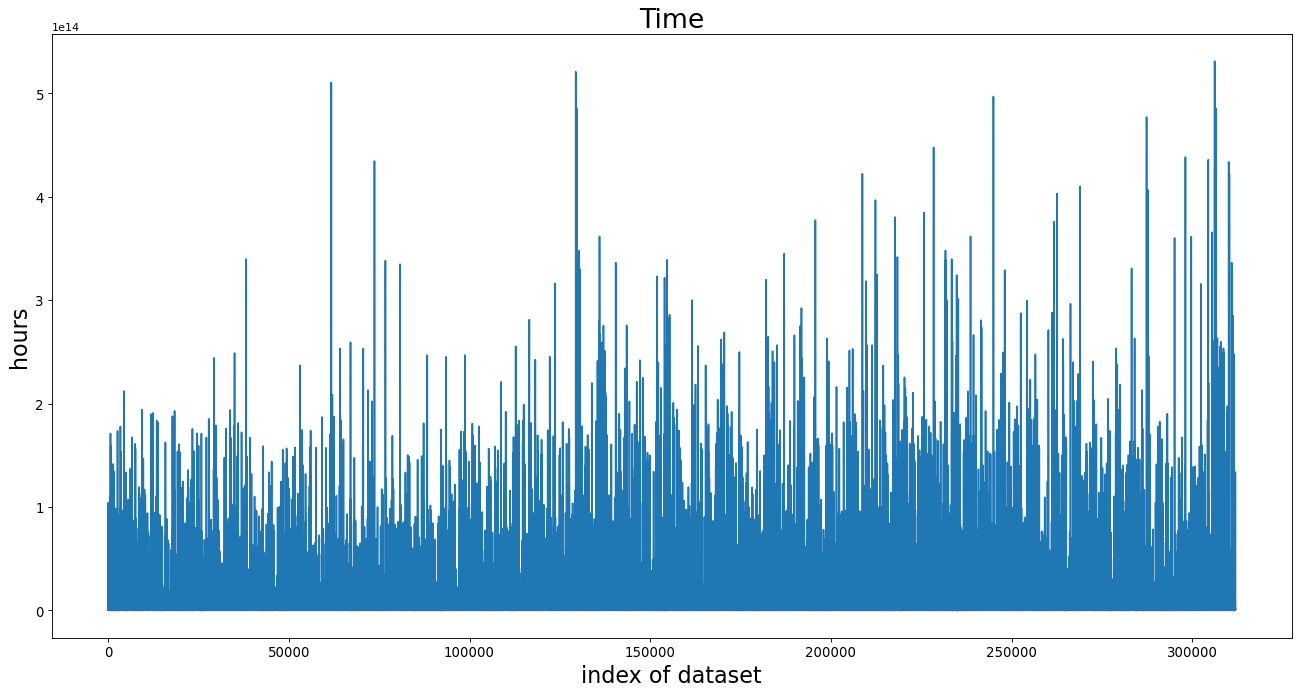

In [43]:
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df['diff_times'], color = 'tab:blue')
ax.set_title("Time", dic)
ax.set_ylabel('hours',**axis_font)
ax.set_xlabel('index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()